# Expt 11: THF -0.8V

- 218386: OCV
- 218389: tNR -0.1 to -0.8 V
- 218393: -0.8 V steady state
- 218396: tNR return to OCV
- 218397: Final OCV



In [9]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/TrON'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

from bumps import serialize

import importlib
try:
    import bumps
    from bumps import dream
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

if HAS_BUMPS:
    from tron.bayesian_analysis import fit_uncertainties
    importlib.reload(fit_uncertainties)

#from tron.bayesian_analysis import summary_plots

In [6]:
def plot_sld(idx_offset, data, label, z_offset=0, color=None):
    z_id = idx_offset
    sld_low_id = idx_offset + 1
    sld_high_id = idx_offset + 2
    sld_best_id = idx_offset + 5

    z = data[z_id]
    best = data[sld_best_id]
    low = data[sld_low_id]
    high = data[sld_high_id]

    _z = z[-1] - z + z_offset
    plt.plot(
        _z,
        best,
        markersize=4,
        label=label,
        linewidth=2,
    )
    plt.fill_between(
        _z,
        low,
        high,
        alpha=0.2,
        color=plt.gca().lines[-1].get_color(),
    )



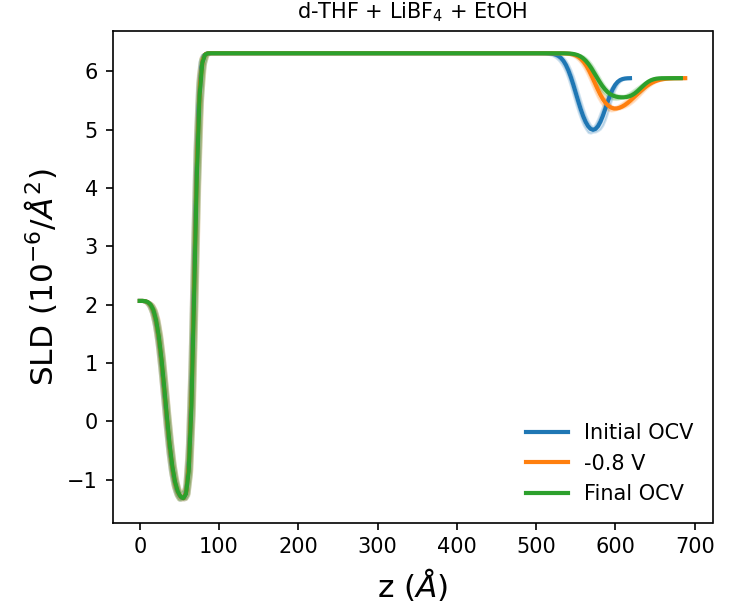

In [ ]:
results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/")



data = np.genfromtxt(os.path.join(results_dir, "expt11-contours.csv"), delimiter=",").T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

plot_sld(0, data, "Initial OCV", z_offset=0)
plot_sld(6, data, "-0.8 V", z_offset=0)
plot_sld(12, data, "Final OCV", z_offset=0)

plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)
plt.title("d-THF + LiBF$_4$ + EtOH", fontsize=10)
plt.legend(frameon=False)
plt.savefig("expt11-all-corefine.svg")


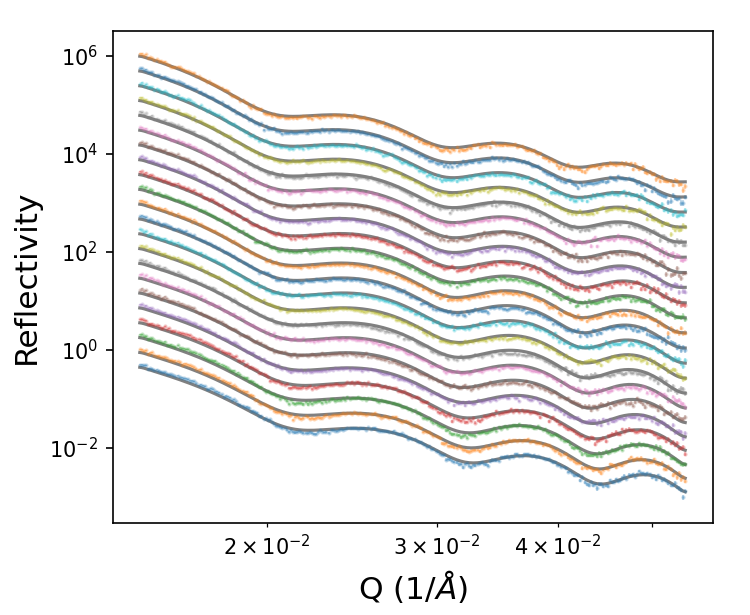

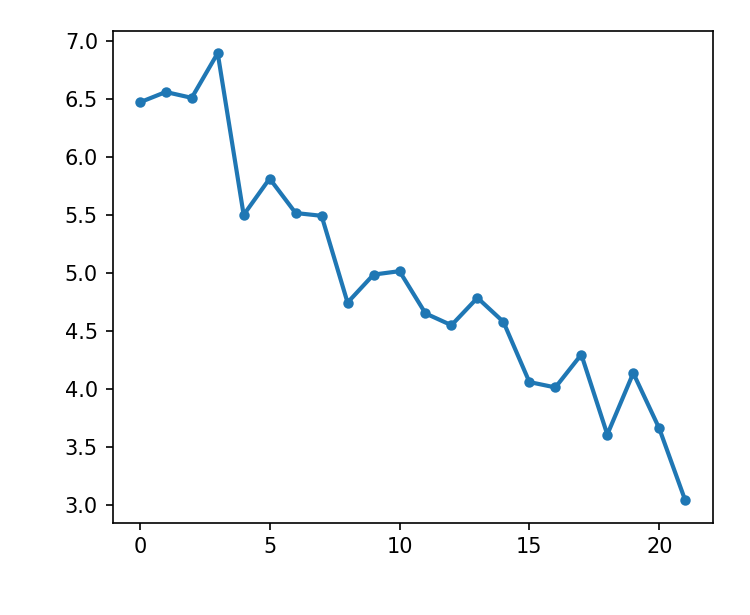

In [96]:
results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/expt11-tNR-1")

results = os.listdir(results_dir)
results = [r for r in results if r.endswith("refl.dat")]
# The results are in the form of Cu-THF-corefine-expt11-tNR-<number>-refl.dat
results = sorted(results, key=lambda x: int(x.split("-")[-2]))


fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

scale = 1
chi2 = []
for r in results:
    data = np.loadtxt(os.path.join(results_dir, r)).T
    plt.errorbar(
        data[0],
        data[2] * scale,
        yerr=data[3] * scale,
        label=r.split(".")[0],
        fmt="o",
        markersize=1,
        elinewidth=1,
        alpha=0.25,
    )
    plt.plot(data[0], data[4]*scale, color="gray")
    scale *= 2
    chi2_item = np.mean(
        ((data[2] - data[4]) / data[3]) ** 2
    )
    chi2.append(chi2_item)

handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.savefig("expt11-tNR-1-refl.svg")

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
plt.plot(
    range(len(chi2)),
    chi2,
    marker="o",
    markersize=4,
    linewidth=2,
)

In [86]:
# Fit parameters
fit_pars_json = os.path.join(results_dir, "Cu-THF-corefine-expt11-tNR-err.json")
with open(fit_pars_json, 'r') as f:
    fit_pars = json.load(f)
    for p in fit_pars.keys():
        print(f"{p}: {fit_pars[p]['best']:.2f} +- {fit_pars[p]['std']:.2f}")

Cu thickness: 484.94 +- 3.25
Cu thickness 1: 487.81 +- 3.14
Cu thickness 10: 508.59 +- 4.15
Cu thickness 11: 507.93 +- 4.12
Cu thickness 12: 510.51 +- 4.31
Cu thickness 13: 508.65 +- 4.47
Cu thickness 14: 513.20 +- 4.60
Cu thickness 15: 515.71 +- 4.53
Cu thickness 16: 514.13 +- 4.80
Cu thickness 17: 517.60 +- 5.26
Cu thickness 18: 517.55 +- 5.12
Cu thickness 19: 519.66 +- 5.40
Cu thickness 2: 488.05 +- 3.20
Cu thickness 20: 516.51 +- 5.66
Cu thickness 21: 517.64 +- 5.89
Cu thickness 3: 491.33 +- 3.23
Cu thickness 4: 497.34 +- 3.52
Cu thickness 5: 500.07 +- 4.03
Cu thickness 6: 499.87 +- 4.05
Cu thickness 7: 503.31 +- 3.92
Cu thickness 8: 509.03 +- 4.07
Cu thickness 9: 507.59 +- 4.17
THF interface end: 22.73 +- 5.05
intensity: 0.92 +- 0.00
material interface end: 24.86 +- 3.02
material rho end: 4.91 +- 0.19
material thickness end: 39.96 +- 9.30
theta_offset: -0.00 +- 0.00


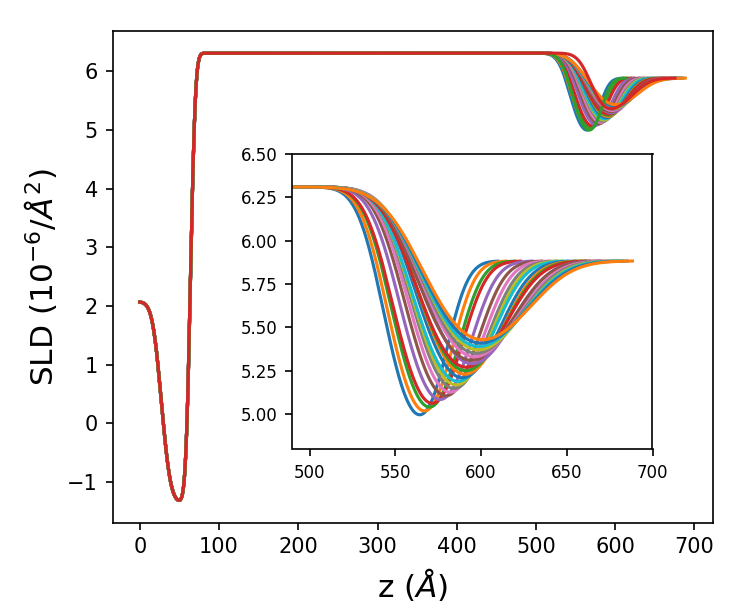

In [97]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/expt11-tNR-1")

results = os.listdir(results_dir)
results = [r for r in results if r.endswith("profile.dat")]
# The results are in the form of Cu-THF-corefine-expt11-tNR-<number>-refl.dat
results = sorted(results, key=lambda x: int(x.split("-")[-2]))


fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)

scale = 1

for r in results:
    data = np.loadtxt(os.path.join(results_dir, r)).T
    #pre_sld[0][-1]-pre_sld[0]+z_offset
    plt.plot(data[0][-1]-data[0], data[1]*scale)
    #scale = 0.2



steady_results_dir = os.path.expanduser("~/git/experiments-2025/jen-apr2025/results/expt11-all-corefine")

data = np.loadtxt(os.path.join(steady_results_dir, "Cu-THF-corefine-expt11-1-profile.dat")).T
plt.plot(data[0][-1]-data[0], data[1]*scale)

data = np.loadtxt(os.path.join(steady_results_dir, "Cu-THF-corefine-expt11-2-profile.dat")).T
plt.plot(data[0][-1]-data[0], data[1]*scale)

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles[::-1], labels[::-1], frameon=False, prop={'size': 7})

plt.xlabel("z ($\AA$)", fontsize=15)
plt.ylabel("SLD ($10^{-6}/{\AA}^2$)", fontsize=15)

# Add a zoomed-in panel

# Define the inset axes
#ax_inset = inset_axes(ax, width="60%", height="60%", loc="lower right")

ax_inset = ax.inset_axes([0.3, 0.15, 0.6, 0.6])

# Plot the same data in the inset
for r in results:
    data = np.loadtxt(os.path.join(results_dir, r)).T
    ax_inset.plot(data[0][-1]-data[0], data[1]*scale)

# Set the zoomed-in range
ax_inset.set_xlim(490, 700)  # Adjust as needed
ax_inset.set_ylim(4.8, 6.5)   # Adjust as needed

# Add labels to the inset
#ax_inset.set_xlabel("z ($\AA$)", fontsize=10)
#ax_inset.set_ylabel("SLD", fontsize=10)
ax_inset.tick_params(axis='both', which='major', labelsize=8)

plt.savefig("expt11-tNR-1-SLD.svg")